In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
from sklearn.pipeline import Pipeline

from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor

from sklearn.linear_model import ElasticNet
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge

from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix


In [4]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 200)

# import previously prepared feature data

In [5]:
# df = pd.read_csv('_readyModel/df5.csv', index_col=0)
df = pd.read_csv('_readyModel/df8.csv', index_col=1)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21634 entries, 20300001 to 41800406
Data columns (total 45 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Unnamed: 0                21634 non-null  int64  
 1   GAME_TYPE                 21634 non-null  object 
 2   GAME_TYPE_CODE            21634 non-null  int64  
 3   GAME_DATE_EST             21634 non-null  object 
 4   SEASON                    21634 non-null  int64  
 5   TEAM_ID_TEAM1             21634 non-null  int64  
 6   TEAM_ABBR_TEAM1           21634 non-null  object 
 7   TEAM_ID_opp_TEAM1         21634 non-null  int64  
 8   TEAM_ABBR_opp_TEAM1       21634 non-null  object 
 9   TEAM_ID_TEAM2             21634 non-null  int64  
 10  TEAM_ABBR_TEAM2           21634 non-null  object 
 11  TEAM_ID_opp_TEAM2         21634 non-null  int64  
 12  TEAM_ABBR_opp_TEAM2       21634 non-null  object 
 13  d_PTS_TEAM2               21634 non-null  float64
 

In [7]:
df[df['c_WIN_pct_at_AWAY_TEAM1'].isnull()]

,Unnamed: 0,GAME_TYPE,GAME_TYPE_CODE,GAME_DATE_EST,SEASON,TEAM_ID_TEAM1,TEAM_ABBR_TEAM1,TEAM_ID_opp_TEAM1,TEAM_ABBR_opp_TEAM1,TEAM_ID_TEAM2,TEAM_ABBR_TEAM2,TEAM_ID_opp_TEAM2,TEAM_ABBR_opp_TEAM2,d_PTS_TEAM2,GAME_NO_TEAM1,GAME_NO_TEAM2,IsHomeTeam_TEAM1,IS_POST_SEASON,d_PTS_H2H_per_GAME_TEAM1,d_PTS_per_GAME_TEAM1,c_WIN_pct_TEAM1,c_WIN_pct_at_HOME_TEAM1,c_WIN_pct_at_AWAY_TEAM1,c_FGM_per_GAME_TEAM1,c_FGA_per_GAME_TEAM1,c_PTS_per_GAME_TEAM1,c_PTS_opp_per_GAME_TEAM1,c_OFF_EFF_TEAM1,c_DEF_EFF_TEAM1,r_WIN_pct_L3_TEAM1,r_WIN_pct_L8_TEAM1,d_PTS_per_GAME_TEAM2,c_WIN_pct_TEAM2,c_WIN_pct_at_HOME_TEAM2,c_WIN_pct_at_AWAY_TEAM2,c_FGM_per_GAME_TEAM2,c_FGA_per_GAME_TEAM2,c_PTS_per_GAME_TEAM2,c_PTS_opp_per_GAME_TEAM2,c_OFF_EFF_TEAM2,c_DEF_EFF_TEAM2,r_WIN_pct_L3_TEAM2,r_WIN_pct_L8_TEAM2,y_d_PTS,y_TEAM1WIN
GAME_ID,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,


In [8]:
df[df['c_WIN_pct_at_AWAY_TEAM2'].isnull()]

,Unnamed: 0,GAME_TYPE,GAME_TYPE_CODE,GAME_DATE_EST,SEASON,TEAM_ID_TEAM1,TEAM_ABBR_TEAM1,TEAM_ID_opp_TEAM1,TEAM_ABBR_opp_TEAM1,TEAM_ID_TEAM2,TEAM_ABBR_TEAM2,TEAM_ID_opp_TEAM2,TEAM_ABBR_opp_TEAM2,d_PTS_TEAM2,GAME_NO_TEAM1,GAME_NO_TEAM2,IsHomeTeam_TEAM1,IS_POST_SEASON,d_PTS_H2H_per_GAME_TEAM1,d_PTS_per_GAME_TEAM1,c_WIN_pct_TEAM1,c_WIN_pct_at_HOME_TEAM1,c_WIN_pct_at_AWAY_TEAM1,c_FGM_per_GAME_TEAM1,c_FGA_per_GAME_TEAM1,c_PTS_per_GAME_TEAM1,c_PTS_opp_per_GAME_TEAM1,c_OFF_EFF_TEAM1,c_DEF_EFF_TEAM1,r_WIN_pct_L3_TEAM1,r_WIN_pct_L8_TEAM1,d_PTS_per_GAME_TEAM2,c_WIN_pct_TEAM2,c_WIN_pct_at_HOME_TEAM2,c_WIN_pct_at_AWAY_TEAM2,c_FGM_per_GAME_TEAM2,c_FGA_per_GAME_TEAM2,c_PTS_per_GAME_TEAM2,c_PTS_opp_per_GAME_TEAM2,c_OFF_EFF_TEAM2,c_DEF_EFF_TEAM2,r_WIN_pct_L3_TEAM2,r_WIN_pct_L8_TEAM2,y_d_PTS,y_TEAM1WIN
GAME_ID,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,


In [9]:
df.columns[14:-2]

Index(['GAME_NO_TEAM1', 'GAME_NO_TEAM2', 'IsHomeTeam_TEAM1', 'IS_POST_SEASON',
       'd_PTS_H2H_per_GAME_TEAM1', 'd_PTS_per_GAME_TEAM1', 'c_WIN_pct_TEAM1',
       'c_WIN_pct_at_HOME_TEAM1', 'c_WIN_pct_at_AWAY_TEAM1',
       'c_FGM_per_GAME_TEAM1', 'c_FGA_per_GAME_TEAM1', 'c_PTS_per_GAME_TEAM1',
       'c_PTS_opp_per_GAME_TEAM1', 'c_OFF_EFF_TEAM1', 'c_DEF_EFF_TEAM1',
       'r_WIN_pct_L3_TEAM1', 'r_WIN_pct_L8_TEAM1', 'd_PTS_per_GAME_TEAM2',
       'c_WIN_pct_TEAM2', 'c_WIN_pct_at_HOME_TEAM2', 'c_WIN_pct_at_AWAY_TEAM2',
       'c_FGM_per_GAME_TEAM2', 'c_FGA_per_GAME_TEAM2', 'c_PTS_per_GAME_TEAM2',
       'c_PTS_opp_per_GAME_TEAM2', 'c_OFF_EFF_TEAM2', 'c_DEF_EFF_TEAM2',
       'r_WIN_pct_L3_TEAM2', 'r_WIN_pct_L8_TEAM2'],
      dtype='object')

### Slice data into features and response (Train, Test)

In [10]:
X = df[
    df.columns[14:-2].values
].copy()

In [11]:
y = df['y_d_PTS'].copy()
# y = df['y_TEAM1WIN'].copy()

In [12]:
X

,GAME_NO_TEAM1,GAME_NO_TEAM2,IsHomeTeam_TEAM1,IS_POST_SEASON,d_PTS_H2H_per_GAME_TEAM1,d_PTS_per_GAME_TEAM1,c_WIN_pct_TEAM1,c_WIN_pct_at_HOME_TEAM1,c_WIN_pct_at_AWAY_TEAM1,c_FGM_per_GAME_TEAM1,c_FGA_per_GAME_TEAM1,c_PTS_per_GAME_TEAM1,c_PTS_opp_per_GAME_TEAM1,c_OFF_EFF_TEAM1,c_DEF_EFF_TEAM1,r_WIN_pct_L3_TEAM1,r_WIN_pct_L8_TEAM1,d_PTS_per_GAME_TEAM2,c_WIN_pct_TEAM2,c_WIN_pct_at_HOME_TEAM2,c_WIN_pct_at_AWAY_TEAM2,c_FGM_per_GAME_TEAM2,c_FGA_per_GAME_TEAM2,c_PTS_per_GAME_TEAM2,c_PTS_opp_per_GAME_TEAM2,c_OFF_EFF_TEAM2,c_DEF_EFF_TEAM2,r_WIN_pct_L3_TEAM2,r_WIN_pct_L8_TEAM2
GAME_ID,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
20300001,1,1,0,0,0.000000,-5.049000,0.305000,0.390000,0.171000,32.780000,79.476000,85.561000,90.610000,97.716000,103.482000,0.000000,0.000,2.305000,0.585000,0.610000,0.049000,36.280000,80.976000,96.841000,94.537000,106.032000,103.508000,0.000000,0.000
20300002,1,1,0,0,0.000000,1.134000,0.537000,0.732000,0.390000,36.646000,82.634000,95.537000,94.402000,104.845000,103.600000,0.000000,0.000,5.415000,0.732000,0.805000,0.146000,35.463000,76.793000,95.805000,90.390000,107.416000,101.345000,0.000000,0.000
20300003,1,1,1,0,0.000000,2.329000,0.610000,0.756000,0.293000,37.695000,83.610000,100.366000,98.037000,108.425000,105.909000,0.000000,0.000,7.780000,0.732000,0.805000,0.146000,38.549000,85.146000,102.976000,95.195000,112.653000,104.141000,0.000000,0.000
20300004,2,1,0,0,0.000000,-15.000000,0.000000,0.390000,0.000000,29.000000,71.000000,74.000000,89.000000,90.177039,108.456169,0.000000,0.000,-0.390000,0.537000,0.610000,0.146000,32.927000,79.378000,92.671000,93.061000,103.010000,103.443000,0.000000,0.000
20300005,1,1,1,0,0.000000,-1.354000,0.451000,0.585000,0.268000,36.183000,82.012000,95.854000,97.207000,105.716000,107.209000,0.000000,0.000,0.134000,0.512000,0.634000,0.244000,35.939000,82.476000,98.512000,98.378000,106.557000,106.412000,0.000000,0.000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41800402,100,102,0,1,-10.666667,6.353535,0.696970,0.734694,0.660000,43.737374,89.323232,117.525253,111.171717,119.322642,112.871938,0.666667,0.750,5.990099,0.702970,0.788462,0.612245,41.316832,88.217822,112.782178,106.792079,115.599792,109.460043,1.000000,0.750
41800403,101,103,1,1,-6.750000,6.340000,0.700000,0.734694,0.666667,43.680000,89.250000,117.440000,111.100000,119.253260,112.815371,0.666667,0.875,5.882353,0.696078,0.773585,0.612245,41.254902,88.274510,112.696078,106.813725,115.469075,109.441981,0.666667,0.625
41800404,102,104,1,1,-8.200000,6.138614,0.693069,0.720000,0.666667,43.603960,89.267327,117.356436,111.217822,119.138311,112.906492,0.333333,0.750,5.961165,0.699029,0.773585,0.620000,41.271845,88.213592,112.796117,106.834951,115.587305,109.478629,0.666667,0.750


In [13]:
y

GAME_ID
20300001   -15.0
20300002    -1.0
20300003    16.0
20300004   -23.0
20300005    -2.0
            ... 
41800402     5.0
41800403   -14.0
41800404   -13.0
41800405    -1.0
41800406     4.0
Name: y_d_PTS, Length: 21634, dtype: float64

In [14]:
# helper variables

y_response = 'y_d_PTS'
season_filter = '2019'
# y_response = 'y_TEAM1WIN'

### Variable Assignment

In [15]:
X_train1 = df.query('SEASON != ' + season_filter)[df.columns[14:-2].values]
X_train1.shape
#X_train1

(20734, 29)

In [16]:
X_train1

,GAME_NO_TEAM1,GAME_NO_TEAM2,IsHomeTeam_TEAM1,IS_POST_SEASON,d_PTS_H2H_per_GAME_TEAM1,d_PTS_per_GAME_TEAM1,c_WIN_pct_TEAM1,c_WIN_pct_at_HOME_TEAM1,c_WIN_pct_at_AWAY_TEAM1,c_FGM_per_GAME_TEAM1,c_FGA_per_GAME_TEAM1,c_PTS_per_GAME_TEAM1,c_PTS_opp_per_GAME_TEAM1,c_OFF_EFF_TEAM1,c_DEF_EFF_TEAM1,r_WIN_pct_L3_TEAM1,r_WIN_pct_L8_TEAM1,d_PTS_per_GAME_TEAM2,c_WIN_pct_TEAM2,c_WIN_pct_at_HOME_TEAM2,c_WIN_pct_at_AWAY_TEAM2,c_FGM_per_GAME_TEAM2,c_FGA_per_GAME_TEAM2,c_PTS_per_GAME_TEAM2,c_PTS_opp_per_GAME_TEAM2,c_OFF_EFF_TEAM2,c_DEF_EFF_TEAM2,r_WIN_pct_L3_TEAM2,r_WIN_pct_L8_TEAM2
GAME_ID,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
20300001,1,1,0,0,0.000000,-5.049000,0.305000,0.390000,0.171000,32.780000,79.476000,85.561000,90.610000,97.716000,103.482000,0.000000,0.000,2.305000,0.585000,0.610000,0.049000,36.280000,80.976000,96.841000,94.537000,106.032000,103.508000,0.000000,0.000
20300002,1,1,0,0,0.000000,1.134000,0.537000,0.732000,0.390000,36.646000,82.634000,95.537000,94.402000,104.845000,103.600000,0.000000,0.000,5.415000,0.732000,0.805000,0.146000,35.463000,76.793000,95.805000,90.390000,107.416000,101.345000,0.000000,0.000
20300003,1,1,1,0,0.000000,2.329000,0.610000,0.756000,0.293000,37.695000,83.610000,100.366000,98.037000,108.425000,105.909000,0.000000,0.000,7.780000,0.732000,0.805000,0.146000,38.549000,85.146000,102.976000,95.195000,112.653000,104.141000,0.000000,0.000
20300004,2,1,0,0,0.000000,-15.000000,0.000000,0.390000,0.000000,29.000000,71.000000,74.000000,89.000000,90.177039,108.456169,0.000000,0.000,-0.390000,0.537000,0.610000,0.146000,32.927000,79.378000,92.671000,93.061000,103.010000,103.443000,0.000000,0.000
20300005,1,1,1,0,0.000000,-1.354000,0.451000,0.585000,0.268000,36.183000,82.012000,95.854000,97.207000,105.716000,107.209000,0.000000,0.000,0.134000,0.512000,0.634000,0.244000,35.939000,82.476000,98.512000,98.378000,106.557000,106.412000,0.000000,0.000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41800402,100,102,0,1,-10.666667,6.353535,0.696970,0.734694,0.660000,43.737374,89.323232,117.525253,111.171717,119.322642,112.871938,0.666667,0.750,5.990099,0.702970,0.788462,0.612245,41.316832,88.217822,112.782178,106.792079,115.599792,109.460043,1.000000,0.750
41800403,101,103,1,1,-6.750000,6.340000,0.700000,0.734694,0.666667,43.680000,89.250000,117.440000,111.100000,119.253260,112.815371,0.666667,0.875,5.882353,0.696078,0.773585,0.612245,41.254902,88.274510,112.696078,106.813725,115.469075,109.441981,0.666667,0.625
41800404,102,104,1,1,-8.200000,6.138614,0.693069,0.720000,0.666667,43.603960,89.267327,117.356436,111.217822,119.138311,112.906492,0.333333,0.750,5.961165,0.699029,0.773585,0.620000,41.271845,88.213592,112.796117,106.834951,115.587305,109.478629,0.666667,0.750


In [17]:
y_train1 = df.query('SEASON != ' + season_filter)[y_response]

y_train1.shape
#y_train1

(20734,)

In [18]:
X_test1 = df.query('SEASON == ' + season_filter)[df.columns[14:-2].values]
X_test1.shape

(900, 29)

In [19]:
# y_test1 = df['y_TEAM1WIN'][df['SEASON']==2019]

y_test1 = df.query('SEASON == ' + season_filter)[y_response]
y_test1.shape

(900,)

In [20]:
df1_columns = X_train1.columns

# 1 - Linear Regression (Lasso)
# ================

### normalize = True

In [120]:
model1 = Lasso(alpha=0.1, normalize=True)
model1.fit(X_train1, y_train1)
model1.score(X_test1, y_test1)

-0.0022953685513267263

### normalize = False

In [121]:
model1 = Lasso(alpha=0.1, normalize=False)
model1.fit(X_train1, y_train1)
model1.score(X_test1, y_test1)

0.19269460228625468

In [73]:
lasso1_coef = model1.fit(X_train1, y_train1).coef_

In [77]:
df1_coef = pd.DataFrame({'coef': lasso1_coef, 'feature': list(df1_columns.values)}, columns=['coef', 'feature'])

In [122]:
lasso1_coef_filtered = filter(lambda x: x != 0 , lasso1_coef)
list(lasso1_coef_filtered)

[5.872961479918209,
 -0.0039971319068083325,
 0.5660946421601815,
 -0.031141929139920515,
 -0.03518742546546438,
 0.1065066209989746,
 -0.6464670285409849,
 0.10464785365440421,
 0.07658261509165777,
 -0.07524853094424727]

In [123]:
df1_coef.query('coef != 0').sort_values('coef', ascending=False)

,coef,feature
0,5.872961,IsHomeTeam_TEAM1
4,0.566095,d_PTS_per_GAME_TEAM1
12,0.106507,c_OFF_EFF_TEAM1
20,0.104648,c_FGM_per_GAME_TEAM2
21,0.076583,c_FGA_per_GAME_TEAM2
2,-0.003997,GAME_NO_TEAM1.1
9,-0.031142,c_FGA_per_GAME_TEAM1
11,-0.035187,c_PTS_opp_per_GAME_TEAM1
22,-0.075249,c_PTS_per_GAME_TEAM2
16,-0.646467,d_PTS_per_GAME_TEAM2


## calculate predicted winner accuracy

In [124]:
df_y_pred_lasso = pd.DataFrame(index=X_test1.index)

In [125]:
df_y_pred_lasso['y_test'] = y_test1
df_y_pred_lasso['y_pred'] = model1.predict(X_test1)

In [43]:
def is_predicted_winner_correct(pred, test):
    if (pred < 0 and test < 0) or (pred > 0 and test > 0):
        return 1
    else:
        return 0

In [127]:
df_y_pred_lasso['is_correct_winner'] = df_y_pred_lasso.apply(lambda row: is_predicted_winner_correct(row.y_pred, row.y_test), axis = 1)

In [128]:
df_y_pred_lasso

,y_test,y_pred,is_correct_winner
GAME_ID,,,
21900001,8.0,7.989069,1
21900002,-10.0,-5.193391,1
21900003,-1.0,-7.516010,1
21900004,9.0,-5.006114,0
21900005,9.0,9.826356,1
...,...,...,...
21900897,6.0,5.121217,1
21900898,15.0,0.482485,1
21900899,-6.0,-3.628590,1


In [129]:
print('The winner prediction accuracy (unseen data) is:', np.sum(df_y_pred_lasso['is_correct_winner']) / np.sum(len(df_y_pred_lasso)))
print('The score prediction accuracy (unseen data) is:', model1.score(X_test1, y_test1))

The winner prediction accuracy (unseen data) is: 0.6711111111111111
The score prediction accuracy (unseen data) is: 0.19269460228625468


# Trees

In [21]:
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)
X_train = X_train1
X_test = X_test1
y_train = y_train1
y_test = y_test1

In [131]:
# Use a pipeline?

# 2: Single Decision Tree Regressor
# ================

In [132]:
pl = Pipeline([
    #('model', RandomForestClassifier())
    ('model', DecisionTreeRegressor(criterion='mse', 
                                    random_state = 42
                                   )
    )
]
)
# Fit to the training data
pl.fit(X_train, y_train)
model_pred_train = pl.predict(X_train)

In [133]:
# Compute and print accuracy
accuracy = pl.score(X_test, y_test)
print("\nAccuracy on dataset: ", accuracy)


Accuracy on dataset:  -0.9163897059365831


### ======== 2B hyper parameter tuning

In [134]:
DTR = DecisionTreeRegressor(random_state = 42)

from pprint import pprint

# Look at parameters used by our current forest
print('Parameters currently in use:\n')
pprint(DTR.get_params())


Parameters currently in use:

{'ccp_alpha': 0.0,
 'criterion': 'mse',
 'max_depth': None,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'presort': 'deprecated',
 'random_state': 42,
 'splitter': 'best'}


In [135]:
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(30, 90, num = 11)]
max_depth.append(None)

# Number of features to consider at every split
max_features = ['auto', 'sqrt']

# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10, 12, 15, 18]

# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4, 6]

# Create the random grid (dictionary). To be iterated over in the random search  training
random_param = {'max_depth': max_depth,
               'max_features': max_features,               
               'min_samples_leaf': min_samples_leaf,
               'min_samples_split': min_samples_split,
               }
pprint(random_param)

{'max_depth': [30, 36, 42, 48, 54, 60, 66, 72, 78, 84, 90, None],
 'max_features': ['auto', 'sqrt'],
 'min_samples_leaf': [1, 2, 4, 6],
 'min_samples_split': [2, 5, 10, 12, 15, 18]}


In [136]:
from sklearn.model_selection import RandomizedSearchCV

# Instantiate a Decision Tree classifier: tree
tree = DecisionTreeRegressor(random_state=42)

# Instantiate the RandomizedSearchCV object: tree_cv
tree_cv = RandomizedSearchCV(tree, random_param, cv=5)

In [137]:
# Fit it to the data
tree_cv.fit(X_train, y_train)

# Print the tuned parameters and score
print("Tuned Decision Tree Parameters: {}".format(tree_cv.best_params_))
print("Best score is {}".format(tree_cv.best_score_))

Tuned Decision Tree Parameters: {'min_samples_split': 12, 'min_samples_leaf': 6, 'max_features': 'sqrt', 'max_depth': 78}
Best score is -0.18053428425984658


In [138]:
# Now Try with the optimized parameters:
# I re-ran the tree with added inputs when the optimized hyperparameter was on the "edge" of the grid

tree2 = DecisionTreeRegressor(min_samples_split=10,
                              min_samples_leaf=6,
                              max_features='sqrt',
                              max_depth=90,
                              random_state=42
                             )
tree2.fit(X_train, y_train)
tree2.predict(X_test)
# Compute and print accuracy
accuracy = tree2.score(X_test, y_test)
print("\nAccuracy on dataset: ", accuracy)


Accuracy on dataset:  -0.15834740866179864


# 3: Random Forest Regressor
# ================


In [22]:
rfr = RandomForestRegressor(n_estimators=1000,
                            bootstrap=True,
                            criterion='mse', 
                            max_depth=10,
                            min_samples_split=4,
                            min_samples_leaf=1,
                            random_state = 42)
rfr.fit(X_train, y_train)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=10, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=4, min_weight_fraction_leaf=0.0,
                      n_estimators=1000, n_jobs=None, oob_score=False,
                      random_state=42, verbose=0, warm_start=False)

In [23]:
y_pred = rfr.predict(X_test)

In [24]:
# Compute and print accuracy on new, unseen data
accuracy = rfr.score(X_test, y_test)
print("\nAccuracy on dataset (new, unseen): ", accuracy)

# max depth = 10
# Accuracy on dataset (new, unseen):  0.1831425510771979


Accuracy on dataset (new, unseen):  0.18773393812526018


In [25]:
rfr_feat_importances = rfr.feature_importances_

In [26]:
len(rfr.feature_importances_)

29

In [27]:
rfr_coef = pd.DataFrame({'feature importances': rfr_feat_importances, 'feature': list(df1_columns.values)}, columns=['feature importances', 'feature'])
rfr_coef.sort_values('feature importances', ascending=False)

,feature importances,feature
17,0.180860,d_PTS_per_GAME_TEAM2
5,0.168682,d_PTS_per_GAME_TEAM1
2,0.120283,IsHomeTeam_TEAM1
18,0.040924,c_WIN_pct_TEAM2
6,0.040847,c_WIN_pct_TEAM1
25,0.028664,c_OFF_EFF_TEAM2
26,0.028237,c_DEF_EFF_TEAM2
7,0.024354,c_WIN_pct_at_HOME_TEAM1
10,0.024339,c_FGA_per_GAME_TEAM1
4,0.023624,d_PTS_H2H_per_GAME_TEAM1


### 3B hyper parameter tuning

In [391]:
# Create the random grid (dictionary). To be iterated over in the random search  training
random_grid_3 = {'n_estimators': [1000],              
               #'max_depth': [2, 10, 20],
               'max_depth': [10],
               #'min_samples_split': [2],
               'min_samples_split': [2,4,6],
               'min_samples_leaf': [1,2,8],
               'bootstrap': [True]}

In [146]:
rfr_tune = RandomForestRegressor()
rfr_tune_random = RandomizedSearchCV(estimator = rfr_tune, 
                               param_distributions = random_grid_3, 
                               n_iter = 100, 
                               cv = 3, 
                               verbose=2, 
                               random_state=42, 
                               n_jobs = -1)

# Fit the random search model
rfr_tune_random.fit(X_train, y_train)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:281: UserWarning: The total space of parameters 9 is smaller than n_iter=100. Running 9 iterations. For exhaustive searches, use GridSearchCV.
  % (grid_size, self.n_iter, grid_size), UserWarning)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.


Fitting 3 folds for each of 9 candidates, totalling 27 fits


[Parallel(n_jobs=-1)]: Done  27 out of  27 | elapsed: 16.7min finished


RandomizedSearchCV(cv=3, error_score=nan,
                   estimator=RandomForestRegressor(bootstrap=True,
                                                   ccp_alpha=0.0,
                                                   criterion='mse',
                                                   max_depth=None,
                                                   max_features='auto',
                                                   max_leaf_nodes=None,
                                                   max_samples=None,
                                                   min_impurity_decrease=0.0,
                                                   min_impurity_split=None,
                                                   min_samples_leaf=1,
                                                   min_samples_split=2,
                                                   min_weight_fraction_leaf=0.0,
                                                   n_estimators=100,
                              

In [49]:
rfr_tune_random.best_params_
# min samples split 4
# min sample leaf 8


{'n_estimators': 1000,
 'min_samples_split': 4,
 'min_samples_leaf': 8,
 'max_depth': 10,
 'bootstrap': True}

In [147]:
rfr_w_tuned= RandomForestRegressor(n_estimators=1000,
                            bootstrap=False,
                            criterion='mse', 
                            max_depth=10,
                            min_samples_split=4,
                            min_samples_leaf=8,
                            random_state = 42)
rfr_w_tuned.fit(X_train, y_train)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=10, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=8,
                      min_samples_split=4, min_weight_fraction_leaf=0.0,
                      n_estimators=1000, n_jobs=None, oob_score=False,
                      random_state=42, verbose=0, warm_start=False)

In [148]:
y_pred_tuned = rfr_w_tuned.predict(X_test)

In [393]:
accuracy_rfr_w_tuned = rfr_w_tuned.score(X_test, y_test)
accuracy_rfr_w_tuned 

0.19024523458185616

In [49]:
# https://towardsdatascience.com/hyperparameter-tuning-the-random-forest-in-python-using-scikit-learn-28d2aa77dd74

# ===================
# Output Results - checking predicted winners

In [ ]:
# let'd output the results to compare on how well the regression model predicted winners 
# (regardless of how well it predicted differential score)

In [149]:
df_y_pred = pd.DataFrame(index=X_test.index)

In [150]:
df_y_pred['y_pred'] = y_pred
df_y_pred['y_pred_tuned'] = y_pred_tuned 
df_y_pred['y_test'] = y_test

In [151]:
def is_predicted_winner_correct(pred, test):
    if (pred < 0 and test < 0) or (pred > 0 and test > 0):
        return 1
    else:
        return 0
    
df_y_pred['is_correct_winner'] = df_y_pred.apply(lambda row: is_predicted_winner_correct(row.y_pred, row.y_test), axis = 1)
df_y_pred['is_correct_winner_tuned'] = df_y_pred.apply(lambda row: is_predicted_winner_correct(row.y_pred_tuned, row.y_test), axis = 1)

In [152]:
df_y_pred

,y_pred,y_pred_tuned,y_test,is_correct_winner,is_correct_winner_tuned
GAME_ID,,,,,
21900001,8.009532,7.738666,8.0,1,1
21900002,-6.314703,-5.777450,-10.0,1,1
21900003,-5.861493,-5.753657,-1.0,1,1
21900004,-6.380775,-5.859570,9.0,0,0
21900005,12.091216,11.649570,9.0,1,1
...,...,...,...,...,...
21900897,7.066401,7.347434,6.0,1,1
21900898,-0.524504,-0.701679,15.0,0,0
21900899,-4.384170,-4.147304,-6.0,1,1


In [394]:

print('The winner prediction accuracy (unseen data) is:', np.sum(df_y_pred['is_correct_winner']) / np.sum(len(df_y_pred)))

print('The winner prediction accuracy TUNED (unseen data) is:', np.sum(df_y_pred['is_correct_winner_tuned']) / np.sum(len(df_y_pred)))

print('The score prediction accuracy R^2 (unseen data) is:', accuracy)

print('The score prediction accuracy R^2 TUNED (unseen data) is:', accuracy_rfr_w_tuned)

The winner prediction accuracy (unseen data) is: 0.6622222222222223
The winner prediction accuracy TUNED (unseen data) is: 0.6677777777777778
The score prediction accuracy R^2 (unseen data) is: 0.18773393812526018
The score prediction accuracy R^2 TUNED (unseen data) is: 0.19024523458185616


# 3C Random Forest Regressor (Max 5 feat.)
# ===================

In [30]:
from sklearn.feature_selection import SelectFromModel


In [31]:
# feature selection
def select_features(X_train, y_train, X_test):
    # configure to select a subset of features
    fs = SelectFromModel(RandomForestRegressor(n_estimators=1000,
                            bootstrap=True,
                            criterion='mse', 
                            max_depth=10,
                            min_samples_split=4,
                            min_samples_leaf=8,
                            random_state = 42), max_features=5)
    # learn relationship from training data
    fs.fit(X_train, y_train)
    # transform train input data
    X_train_fs = fs.transform(X_train)
    # transform test input data
    X_test_fs = fs.transform(X_test)
    return X_train_fs, X_test_fs, fs

In [32]:
# feature selection
X_train_fs, X_test_fs, fs_rfr = select_features(X_train, y_train, X_test)

In [33]:
feature_idx_rfr = fs_rfr.get_support()
feature_name_rfr = X_train.columns[feature_idx_rfr]
feature_name_rfr

Index(['IsHomeTeam_TEAM1', 'd_PTS_per_GAME_TEAM1', 'c_WIN_pct_TEAM1',
       'd_PTS_per_GAME_TEAM2', 'c_WIN_pct_TEAM2'],
      dtype='object')

In [34]:
rfr_fs = RandomForestRegressor(n_estimators=1000,
                            bootstrap=True,
                            criterion='mse', 
                            max_depth=10,
                            min_samples_split=4,
                            min_samples_leaf=8,
                            max_features = 5,
                            random_state = 42)

In [35]:
rfr_fs.fit(X_train_fs, y_train)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=10, max_features=5, max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=8,
                      min_samples_split=4, min_weight_fraction_leaf=0.0,
                      n_estimators=1000, n_jobs=None, oob_score=False,
                      random_state=42, verbose=0, warm_start=False)

In [36]:
accuracy_rfr_fs = rfr_fs.score(X_test_fs, y_test)
accuracy_rfr_fs

0.18013465295128606

In [37]:
# testing to see if the order of rows is the same as the original dataframe (it is)
X_test_fs

array([[ 1.        ,  6.08536585,  0.70731707, -1.32926829,  0.40243902],
       [ 0.        , -1.7195122 ,  0.45121951,  0.85365854,  0.58536585],
       [ 0.        , -8.41463415,  0.26829268, -1.09756098,  0.47560976],
       ...,
       [ 0.        , -3.04918033,  0.32786885, -2.13559322,  0.42372881],
       [ 0.        ,  7.39655172,  0.77586207, -0.93220339,  0.44067797],
       [ 1.        , -9.        ,  0.21666667, -4.25862069,  0.36206897]])

In [38]:
y_pred_rfr_fs = rfr_fs.predict(X_test_fs)

In [39]:
df_y_pred_fs = pd.DataFrame(X_test_fs)

df_y_pred_fs.columns = feature_name_rfr
df_y_pred_fs


,IsHomeTeam_TEAM1,d_PTS_per_GAME_TEAM1,c_WIN_pct_TEAM1,d_PTS_per_GAME_TEAM2,c_WIN_pct_TEAM2
0,1.0,6.085366,0.707317,-1.329268,0.402439
1,0.0,-1.719512,0.451220,0.853659,0.585366
2,0.0,-8.414634,0.268293,-1.097561,0.475610
3,0.0,-0.243902,0.500000,3.329268,0.585366
4,1.0,0.707317,0.512195,-9.609756,0.231707
...,...,...,...,...,...
895,1.0,6.203390,0.677966,2.200000,0.616667
896,1.0,3.305085,0.677966,6.728814,0.711864
897,0.0,-3.049180,0.327869,-2.135593,0.423729
898,0.0,7.396552,0.775862,-0.932203,0.440678


In [40]:
df_y_pred_fs['y_pred'] = y_pred
df_y_pred_fs['y_pred_rfr_fs'] = y_pred_rfr_fs
df_y_pred_fs['y_test'] = y_test.values

In [44]:
df_y_pred_fs['is_correct_winner'] = df_y_pred_fs.apply(lambda row: is_predicted_winner_correct(row.y_pred, row.y_test), axis = 1)
df_y_pred_fs['is_correct_winner_fs'] = df_y_pred_fs.apply(lambda row: is_predicted_winner_correct(row.y_pred_rfr_fs, row.y_test), axis = 1)

In [45]:
df_y_pred_fs

,IsHomeTeam_TEAM1,d_PTS_per_GAME_TEAM1,c_WIN_pct_TEAM1,d_PTS_per_GAME_TEAM2,c_WIN_pct_TEAM2,y_pred,y_pred_rfr_fs,y_test,is_correct_winner,is_correct_winner_fs
0,1.0,6.085366,0.707317,-1.329268,0.402439,8.009532,7.917320,8.0,1,1
1,0.0,-1.719512,0.451220,0.853659,0.585366,-6.314703,-4.231200,-10.0,1,1
2,0.0,-8.414634,0.268293,-1.097561,0.475610,-5.861493,-9.410074,-1.0,1,1
3,0.0,-0.243902,0.500000,3.329268,0.585366,-6.380775,-4.905140,9.0,0,0
4,1.0,0.707317,0.512195,-9.609756,0.231707,12.091216,9.786161,9.0,1,1
...,...,...,...,...,...,...,...,...,...,...
895,1.0,6.203390,0.677966,2.200000,0.616667,7.066401,6.939693,6.0,1,1
896,1.0,3.305085,0.677966,6.728814,0.711864,-0.524504,0.685623,15.0,0,1
897,0.0,-3.049180,0.327869,-2.135593,0.423729,-4.384170,-4.462962,-6.0,1,1
898,0.0,7.396552,0.775862,-0.932203,0.440678,3.196263,2.578676,8.0,1,1


In [46]:

print('The winner prediction accuracy (unseen data) is:', np.sum(df_y_pred_fs['is_correct_winner']) / np.sum(len(df_y_pred_fs)))

print('The winner prediction accuracy Feature Selection FS (unseen data) is:', np.sum(df_y_pred_fs['is_correct_winner_fs']) / np.sum(len(df_y_pred_fs)))

print('The _score_ prediction accuracy Feature Selection FS (unseen data) is:', accuracy_rfr_fs)

The winner prediction accuracy (unseen data) is: 0.6622222222222223
The winner prediction accuracy Feature Selection FS (unseen data) is: 0.66
The _score_ prediction accuracy Feature Selection FS (unseen data) is: 0.18013465295128606


### plots for residuals

In [ ]:
### Plot 1: Predicted vs. Actual

In [47]:
X_train_fs

array([[ 0.        , -5.049     ,  0.305     ,  2.305     ,  0.585     ],
       [ 0.        ,  1.134     ,  0.537     ,  5.415     ,  0.732     ],
       [ 1.        ,  2.329     ,  0.61      ,  7.78      ,  0.732     ],
       ...,
       [ 1.        ,  6.13861386,  0.69306931,  5.96116505,  0.69902913],
       [ 1.        ,  6.02884615,  0.70192308,  5.95098039,  0.68627451],
       [ 0.        ,  5.96190476,  0.6952381 ,  5.90291262,  0.68932039]])

In [48]:
y_pred_rfr_fs_training = rfr_fs.predict(X_train_fs)

In [52]:
y_pred_rfr_fs_training

array([-8.36566731, -7.14853803, -0.22043907, ..., -2.75800064,
       -1.15718084, -6.04424809])

In [49]:
y_train

GAME_ID
20300001   -15.0
20300002    -1.0
20300003    16.0
20300004   -23.0
20300005    -2.0
            ... 
41800402     5.0
41800403   -14.0
41800404   -13.0
41800405    -1.0
41800406     4.0
Name: y_d_PTS, Length: 20734, dtype: float64

In [53]:
y_train.index

Int64Index([20300001, 20300002, 20300003, 20300004, 20300005, 20300006,
            20300007, 20300008, 20300009, 20300010,
            ...
            41800311, 41800312, 41800313, 41800314, 41800401, 41800402,
            41800403, 41800404, 41800405, 41800406],
           dtype='int64', name='GAME_ID', length=20734)

In [56]:
df_y_pred_rfr_fs_training = pd.DataFrame(y_pred_rfr_fs_training, columns=['y_pred'], index=y_train.index)

In [57]:
df_y_pred_rfr_fs_training

,y_pred
GAME_ID,
20300001,-8.365667
20300002,-7.148538
20300003,-0.220439
20300004,-9.393950
20300005,2.072887
...,...
41800402,-6.442654
41800403,-1.212869
41800404,-2.758001


In [58]:
df_y_pred_rfr_fs_training['y_act'] = y_train

In [59]:
df_y_pred_rfr_fs_training

,y_pred,y_act
GAME_ID,,
20300001,-8.365667,-15.0
20300002,-7.148538,-1.0
20300003,-0.220439,16.0
20300004,-9.393950,-23.0
20300005,2.072887,-2.0
...,...,...
41800402,-6.442654,5.0
41800403,-1.212869,-14.0
41800404,-2.758001,-13.0


In [114]:
# spot checking the extremes (yes, brooklyn lost by 61 pts to memphis in 200)
df_y_pred_rfr_fs_training[df_y_pred_rfr_fs_training['y_act']<-50]

,y_pred,y_act,residual,residual_act_pred
GAME_ID,,,,
21400120,-17.548873,-53.0,35.451127,-35.451127
21701072,-12.456747,-61.0,48.543253,-48.543253
21800383,-12.114558,-56.0,43.885442,-43.885442
41400126,-5.673335,-54.0,48.326665,-48.326665


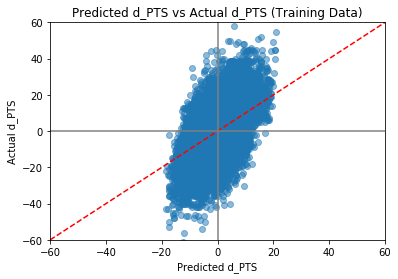

In [106]:
plt.scatter(x=df_y_pred_rfr_fs_training['y_pred'], 
            y=df_y_pred_rfr_fs_training['y_act'],
            alpha=0.5,
            marker='o'
           )
plt.title('Predicted d_PTS vs Actual d_PTS (Training Data)')
plt.xlabel('Predicted d_PTS')
plt.ylabel('Actual d_PTS')

plt.ylim((-60,60))
plt.xlim((-60,60))

x_lim = plt.xlim()
y_lim = plt.ylim()

plt.plot(x_lim, y_lim, '--', color='r', label='Perfect Prediction')


plt.plot([0,0], y_lim, '-', color='grey')
plt.plot(x_lim, [0,0], '-', color='grey')


plt.show()


In [ ]:
### Plot 2: Residuals [y_pred - y_act] vs. y_pred (training data)

In [ ]:
# https://stats.stackexchange.com/questions/342466/are-residuals-predicted-minus-actual-or-actual-minus-predicted

In [102]:
df_y_pred_rfr_fs_training['residual'] = df_y_pred_rfr_fs_training['y_pred'] - df_y_pred_rfr_fs_training['y_act']
df_y_pred_rfr_fs_training['residual_act_pred'] = df_y_pred_rfr_fs_training['y_act'] - df_y_pred_rfr_fs_training['y_pred']

In [103]:
df_y_pred_rfr_fs_training

,y_pred,y_act,residual,residual_act_pred
GAME_ID,,,,
20300001,-8.365667,-15.0,6.634333,-6.634333
20300002,-7.148538,-1.0,-6.148538,6.148538
20300003,-0.220439,16.0,-16.220439,16.220439
20300004,-9.393950,-23.0,13.606050,-13.606050
20300005,2.072887,-2.0,4.072887,-4.072887
...,...,...,...,...
41800402,-6.442654,5.0,-11.442654,11.442654
41800403,-1.212869,-14.0,12.787131,-12.787131
41800404,-2.758001,-13.0,10.241999,-10.241999


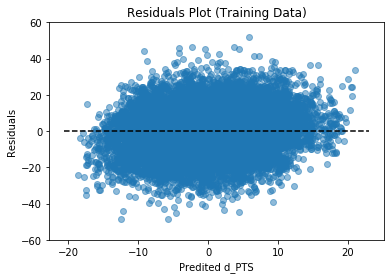

In [108]:
plt.scatter(x=df_y_pred_rfr_fs_training['y_pred'], 
            y=df_y_pred_rfr_fs_training['residual_act_pred'],
            alpha=0.5,
            marker='o'
           )
plt.title('Residuals Plot (Training Data)')
plt.xlabel('Predited d_PTS')
plt.ylabel('Residuals')

plt.ylim((-60,60))


x_lim = plt.xlim()
y_lim = plt.ylim()

# plt.plot(x_lim, y_lim, '--', color='r', label='Perfect Prediction')
# plt.plot([0,0], y_lim, '-', color='grey')
plt.plot(x_lim, [0,0], '--', color='k')


plt.show()

In [ ]:
# https://www.qualtrics.com/support/stats-iq/analyses/regression-guides/interpreting-residual-plots-improve-regression/

# models 4 thru 6
# ===================
## next set of models give response as boolean (classification instead of regression)

- Use the response variable as a boolean and make it a classification problem (and thus use other classifiers)
- maybe this will give a better result

In [154]:
df.columns[14:-2].values

array(['GAME_NO_TEAM1', 'GAME_NO_TEAM2', 'IsHomeTeam_TEAM1',
       'IS_POST_SEASON', 'd_PTS_H2H_per_GAME_TEAM1',
       'd_PTS_per_GAME_TEAM1', 'c_WIN_pct_TEAM1',
       'c_WIN_pct_at_HOME_TEAM1', 'c_WIN_pct_at_AWAY_TEAM1',
       'c_FGM_per_GAME_TEAM1', 'c_FGA_per_GAME_TEAM1',
       'c_PTS_per_GAME_TEAM1', 'c_PTS_opp_per_GAME_TEAM1',
       'c_OFF_EFF_TEAM1', 'c_DEF_EFF_TEAM1', 'r_WIN_pct_L3_TEAM1',
       'r_WIN_pct_L8_TEAM1', 'd_PTS_per_GAME_TEAM2', 'c_WIN_pct_TEAM2',
       'c_WIN_pct_at_HOME_TEAM2', 'c_WIN_pct_at_AWAY_TEAM2',
       'c_FGM_per_GAME_TEAM2', 'c_FGA_per_GAME_TEAM2',
       'c_PTS_per_GAME_TEAM2', 'c_PTS_opp_per_GAME_TEAM2',
       'c_OFF_EFF_TEAM2', 'c_DEF_EFF_TEAM2', 'r_WIN_pct_L3_TEAM2',
       'r_WIN_pct_L8_TEAM2'], dtype=object)

In [155]:
# helper variables

# y_response = 'y_d_PTS'

y_response = 'y_TEAM1WIN'

season_filter = '2019'

X3 = df[df.columns[14:-2].values]
y3 = df[y_response]

X_train3 = df.query('SEASON != ' + season_filter)[df.columns[14:-2].values]
y_train3 = df.query('SEASON != ' + season_filter)[y_response]
X_test3 = df.query('SEASON == ' + season_filter)[df.columns[14:-2].values]
y_test3 = df.query('SEASON == ' + season_filter)[y_response]

In [172]:
X_train3

,GAME_NO_TEAM1,GAME_NO_TEAM2,IsHomeTeam_TEAM1,IS_POST_SEASON,d_PTS_H2H_per_GAME_TEAM1,d_PTS_per_GAME_TEAM1,c_WIN_pct_TEAM1,c_WIN_pct_at_HOME_TEAM1,c_WIN_pct_at_AWAY_TEAM1,c_FGM_per_GAME_TEAM1,c_FGA_per_GAME_TEAM1,c_PTS_per_GAME_TEAM1,c_PTS_opp_per_GAME_TEAM1,c_OFF_EFF_TEAM1,c_DEF_EFF_TEAM1,r_WIN_pct_L3_TEAM1,r_WIN_pct_L8_TEAM1,d_PTS_per_GAME_TEAM2,c_WIN_pct_TEAM2,c_WIN_pct_at_HOME_TEAM2,c_WIN_pct_at_AWAY_TEAM2,c_FGM_per_GAME_TEAM2,c_FGA_per_GAME_TEAM2,c_PTS_per_GAME_TEAM2,c_PTS_opp_per_GAME_TEAM2,c_OFF_EFF_TEAM2,c_DEF_EFF_TEAM2,r_WIN_pct_L3_TEAM2,r_WIN_pct_L8_TEAM2
GAME_ID,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
20300001,1,1,0,0,0.000000,-5.049000,0.305000,0.390000,0.171000,32.780000,79.476000,85.561000,90.610000,97.716000,103.482000,0.000000,0.000,2.305000,0.585000,0.610000,0.049000,36.280000,80.976000,96.841000,94.537000,106.032000,103.508000,0.000000,0.000
20300002,1,1,0,0,0.000000,1.134000,0.537000,0.732000,0.390000,36.646000,82.634000,95.537000,94.402000,104.845000,103.600000,0.000000,0.000,5.415000,0.732000,0.805000,0.146000,35.463000,76.793000,95.805000,90.390000,107.416000,101.345000,0.000000,0.000
20300003,1,1,1,0,0.000000,2.329000,0.610000,0.756000,0.293000,37.695000,83.610000,100.366000,98.037000,108.425000,105.909000,0.000000,0.000,7.780000,0.732000,0.805000,0.146000,38.549000,85.146000,102.976000,95.195000,112.653000,104.141000,0.000000,0.000
20300004,2,1,0,0,0.000000,-15.000000,0.000000,0.390000,0.000000,29.000000,71.000000,74.000000,89.000000,90.177039,108.456169,0.000000,0.000,-0.390000,0.537000,0.610000,0.146000,32.927000,79.378000,92.671000,93.061000,103.010000,103.443000,0.000000,0.000
20300005,1,1,1,0,0.000000,-1.354000,0.451000,0.585000,0.268000,36.183000,82.012000,95.854000,97.207000,105.716000,107.209000,0.000000,0.000,0.134000,0.512000,0.634000,0.244000,35.939000,82.476000,98.512000,98.378000,106.557000,106.412000,0.000000,0.000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41800402,100,102,0,1,-10.666667,6.353535,0.696970,0.734694,0.660000,43.737374,89.323232,117.525253,111.171717,119.322642,112.871938,0.666667,0.750,5.990099,0.702970,0.788462,0.612245,41.316832,88.217822,112.782178,106.792079,115.599792,109.460043,1.000000,0.750
41800403,101,103,1,1,-6.750000,6.340000,0.700000,0.734694,0.666667,43.680000,89.250000,117.440000,111.100000,119.253260,112.815371,0.666667,0.875,5.882353,0.696078,0.773585,0.612245,41.254902,88.274510,112.696078,106.813725,115.469075,109.441981,0.666667,0.625
41800404,102,104,1,1,-8.200000,6.138614,0.693069,0.720000,0.666667,43.603960,89.267327,117.356436,111.217822,119.138311,112.906492,0.333333,0.750,5.961165,0.699029,0.773585,0.620000,41.271845,88.213592,112.796117,106.834951,115.587305,109.478629,0.666667,0.750


# 4: kNN - w/ single model score
# ================

In [156]:
# KNN model attempt
from sklearn.neighbors import KNeighborsClassifier
from sklearn import preprocessing
knn = KNeighborsClassifier(n_neighbors=37)
knn.fit(X_train3, y_train3)
knn.score(X_test3, y_test3)

0.64

In [157]:
y_pred3 = knn.predict(X_test3)
print(confusion_matrix(y_test3,y_pred3))

[[280 157]
 [167 296]]


In [158]:
print(classification_report(y_test3, y_pred3))

              precision    recall  f1-score   support

           0       0.63      0.64      0.63       437
           1       0.65      0.64      0.65       463

    accuracy                           0.64       900
   macro avg       0.64      0.64      0.64       900
weighted avg       0.64      0.64      0.64       900



# 5 kNN w/ CV - (5 model scores avg'd)
# ================

In [159]:
from sklearn.model_selection import cross_val_score

knn_cv = KNeighborsClassifier(n_neighbors=39)
knn_cv_results = cross_val_score(knn_cv, X3, y3, cv=5)

In [160]:
print(knn_cv_results)

[0.60665588 0.63785533 0.63392651 0.6237578  0.5975497 ]


In [161]:
print(np.mean(knn_cv_results))

0.6199490432031196


### hyper parameter tuning

In [162]:
from sklearn.model_selection import GridSearchCV
param_grid = {'n_neighbors': np.arange(10,40)}

knn = KNeighborsClassifier()

knn_gscv = GridSearchCV(knn, param_grid, cv=5)
knn_gscv.fit(X3,y3)
knn_gscv.best_params_

{'n_neighbors': 39}

In [163]:
knn_gscv.best_score_

0.6199490432031196

# 6: Random Forest Classifier
# ============

In [197]:
# Random Forest Classification model 
# depth: 6, trees: 300
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(max_depth=6, random_state=42, n_estimators=1000)
rfc.fit(X_train3, y_train3)

# score on new data
rfc.score(X_test3, y_test3)

0.6644444444444444

In [198]:
rfc.score(X_train3, y_train3)

# testing to see the score on itself
0.7267244045777915

0.7267244045777915

In [199]:
y_pred_rfc = rfc.predict(X_test3)

In [200]:
print(confusion_matrix(y_test3, y_pred_rfc))
print(classification_report(y_test3, y_pred_rfc))

[[280 157]
 [145 318]]
              precision    recall  f1-score   support

           0       0.66      0.64      0.65       437
           1       0.67      0.69      0.68       463

    accuracy                           0.66       900
   macro avg       0.66      0.66      0.66       900
weighted avg       0.66      0.66      0.66       900



In [174]:
df1_columns.values

array(['GAME_NO_TEAM1', 'GAME_NO_TEAM2', 'IsHomeTeam_TEAM1',
       'IS_POST_SEASON', 'd_PTS_H2H_per_GAME_TEAM1',
       'd_PTS_per_GAME_TEAM1', 'c_WIN_pct_TEAM1',
       'c_WIN_pct_at_HOME_TEAM1', 'c_WIN_pct_at_AWAY_TEAM1',
       'c_FGM_per_GAME_TEAM1', 'c_FGA_per_GAME_TEAM1',
       'c_PTS_per_GAME_TEAM1', 'c_PTS_opp_per_GAME_TEAM1',
       'c_OFF_EFF_TEAM1', 'c_DEF_EFF_TEAM1', 'r_WIN_pct_L3_TEAM1',
       'r_WIN_pct_L8_TEAM1', 'd_PTS_per_GAME_TEAM2', 'c_WIN_pct_TEAM2',
       'c_WIN_pct_at_HOME_TEAM2', 'c_WIN_pct_at_AWAY_TEAM2',
       'c_FGM_per_GAME_TEAM2', 'c_FGA_per_GAME_TEAM2',
       'c_PTS_per_GAME_TEAM2', 'c_PTS_opp_per_GAME_TEAM2',
       'c_OFF_EFF_TEAM2', 'c_DEF_EFF_TEAM2', 'r_WIN_pct_L3_TEAM2',
       'r_WIN_pct_L8_TEAM2'], dtype=object)

In [169]:
rfc_feat_importances = rfc.feature_importances_

In [171]:
len(rfc.feature_importances_)

29

In [175]:
rfc_coef = pd.DataFrame({'feature importances': rfc_feat_importances, 'feature': list(df1_columns.values)}, columns=['feature importances', 'feature'])
rfc_coef.sort_values('feature importances', ascending=False)

,feature importances,feature
2,0.153575,IsHomeTeam_TEAM1
17,0.119516,d_PTS_per_GAME_TEAM2
5,0.110566,d_PTS_per_GAME_TEAM1
18,0.093985,c_WIN_pct_TEAM2
6,0.092115,c_WIN_pct_TEAM1
7,0.056486,c_WIN_pct_at_HOME_TEAM1
19,0.054251,c_WIN_pct_at_HOME_TEAM2
20,0.051539,c_WIN_pct_at_AWAY_TEAM2
8,0.044128,c_WIN_pct_at_AWAY_TEAM1
25,0.032606,c_OFF_EFF_TEAM2


# 6B Random Forest Classifier w/ CV

# ===========================

In [207]:
rfc2 = RandomForestClassifier(max_depth=6, random_state=42, n_estimators=1000)
cv_scores_rfc = cross_val_score(rfc2,X3,y3,cv=5)

In [208]:
print(cv_scores_rfc)

print("Average 5-Fold CV Score: {}".format(np.mean(cv_scores_rfc)))

[0.64617518 0.67737462 0.65911717 0.65657499 0.66204346]
Average 5-Fold CV Score: 0.660257085438325


# 6C Random Forest Classifier w/ Top 5 features

In [230]:
# feature selection
def select_features(X_train, y_train, X_test):
    # configure to select a subset of features
    fs = SelectFromModel(RandomForestClassifier(max_depth=6, random_state=42, n_estimators=1000), max_features=5)
    # fs = SelectFromModel(RandomForestClassifier(max_depth=6, random_state=42, n_estimators=1000), threshold=0.09)
    # learn relationship from training data
    fs.fit(X_train, y_train)
    # transform train input data
    X_train_fs = fs.transform(X_train)
    # transform test input data
    X_test_fs = fs.transform(X_test)
    return X_train_fs, X_test_fs, fs

In [321]:
# feature selection
X_train_fs3, X_test_fs3, fs_rfc = select_features(X_train3, y_train3, X_test3)

In [322]:
feature_idx_rfc = fs_rfc.get_support()
feature_name_rfc = X_train3.columns[feature_idx_rfc]
feature_name_rfc

Index(['IsHomeTeam_TEAM1', 'd_PTS_per_GAME_TEAM1', 'c_WIN_pct_TEAM1',
       'd_PTS_per_GAME_TEAM2', 'c_WIN_pct_TEAM2'],
      dtype='object')

In [242]:
rfc_fs = RandomForestClassifier(max_depth=6, random_state=42, n_estimators=1000, max_features=5)

In [244]:
rfc_fs.fit(X_train_fs3, y_train3)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=6, max_features=5,
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=1000,
                       n_jobs=None, oob_score=False, random_state=42, verbose=0,
                       warm_start=False)

In [245]:
rfc_fs.score(X_test_fs3, y_test3)

0.66

In [246]:
y_pred_rfc_fs = rfc_fs.predict(X_test_fs3)

In [247]:
print(confusion_matrix(y_test3, y_pred_rfc_fs))

[[275 162]
 [144 319]]


In [248]:
print(classification_report(y_test3, y_pred_rfc_fs))

              precision    recall  f1-score   support

           0       0.66      0.63      0.64       437
           1       0.66      0.69      0.68       463

    accuracy                           0.66       900
   macro avg       0.66      0.66      0.66       900
weighted avg       0.66      0.66      0.66       900



# =================
# Predicting the 2019 Playoff Winners

### Round 1

In [183]:
df_2019_playoff_r1 = pd.read_csv('_data/df_2019_playoff_r1_w_features.csv', index_col=0)

In [184]:
df_2019_playoff_r1

,TEAM1_ABBR,TEAM2_ABBR,GAME_NO_TEAM1,GAME_NO_TEAM2,IS_TEAM1_HOME,IS_POST_SEASON,d_PTS_H2H_per_GAME_TEAM1,d_PTS_per_GAME_TEAM1,c_WIN_pct_TEAM1,c_WIN_pct_at_HOME_TEAM1,c_WIN_pct_at_AWAY_TEAM1,c_FGM_per_GAME_TEAM1,c_FGA_per_GAME_TEAM1,c_PTS_per_GAME_TEAM1,c_PTS_opp_per_GAME_TEAM1,c_OFF_EFF_TEAM1,c_DEF_EFF_TEAM1,r_WIN_pct_L3_TEAM1,r_WIN_pct_L8_TEAM1,d_PTS_per_GAME_TEAM2,c_WIN_pct_TEAM2,c_WIN_pct_at_HOME_TEAM2,c_WIN_pct_at_AWAY_TEAM2,c_FGM_per_GAME_TEAM2,c_FGA_per_GAME_TEAM2,c_PTS_per_GAME_TEAM2,c_PTS_opp_per_GAME_TEAM2,c_OFF_EFF_TEAM2,c_DEF_EFF_TEAM2,r_WIN_pct_L3_TEAM2,r_WIN_pct_L8_TEAM2
0,MIL,ORL,74,74,1,1,17.0,12.733333,0.866667,0.900000,0.833333,43.833333,91.233333,119.583333,106.850000,116.690164,104.264898,0.0,0.0,-1.266667,0.450000,0.533333,0.366667,38.850000,88.766667,105.266667,106.533333,109.704705,111.024774,0.0,0.0
1,MIL,ORL,75,75,1,1,17.0,12.733333,0.866667,0.900000,0.833333,43.833333,91.233333,119.583333,106.850000,116.690164,104.264898,0.0,0.0,-1.266667,0.450000,0.533333,0.366667,38.850000,88.766667,105.266667,106.533333,109.704705,111.024774,0.0,0.0
2,MIL,ORL,76,76,0,1,17.0,12.733333,0.866667,0.900000,0.833333,43.833333,91.233333,119.583333,106.850000,116.690164,104.264898,0.0,0.0,-1.266667,0.450000,0.533333,0.366667,38.850000,88.766667,105.266667,106.533333,109.704705,111.024774,0.0,0.0
3,MIL,ORL,77,77,0,1,17.0,12.733333,0.866667,0.900000,0.833333,43.833333,91.233333,119.583333,106.850000,116.690164,104.264898,0.0,0.0,-1.266667,0.450000,0.533333,0.366667,38.850000,88.766667,105.266667,106.533333,109.704705,111.024774,0.0,0.0
4,MIL,ORL,78,78,1,1,17.0,12.733333,0.866667,0.900000,0.833333,43.833333,91.233333,119.583333,106.850000,116.690164,104.264898,0.0,0.0,-1.266667,0.450000,0.533333,0.366667,38.850000,88.766667,105.266667,106.533333,109.704705,111.024774,0.0,0.0
5,MIL,ORL,79,79,0,1,17.0,12.733333,0.866667,0.900000,0.833333,43.833333,91.233333,119.583333,106.850000,116.690164,104.264898,0.0,0.0,-1.266667,0.450000,0.533333,0.366667,38.850000,88.766667,105.266667,106.533333,109.704705,111.024774,0.0,0.0
6,MIL,ORL,80,80,1,1,17.0,12.733333,0.866667,0.900000,0.833333,43.833333,91.233333,119.583333,106.850000,116.690164,104.264898,0.0,0.0,-1.266667,0.450000,0.533333,0.366667,38.850000,88.766667,105.266667,106.533333,109.704705,111.024774,0.0,0.0
7,IND,MIA,74,74,1,1,-7.5,2.233333,0.600000,0.677419,0.517241,42.150000,88.550000,109.333333,107.100000,113.420086,111.103273,0.0,0.0,3.283333,0.633333,0.862069,0.419355,39.833333,84.750000,112.783333,109.500000,116.005502,112.628365,0.0,0.0
8,IND,MIA,75,75,1,1,-7.5,2.233333,0.600000,0.677419,0.517241,42.150000,88.550000,109.333333,107.100000,113.420086,111.103273,0.0,0.0,3.283333,0.633333,0.862069,0.419355,39.833333,84.750000,112.783333,109.500000,116.005502,112.628365,0.0,0.0
9,IND,MIA,76,76,0,1,-7.5,2.233333,0.600000,0.677419,0.517241,42.150000,88.550000,109.333333,107.100000,113.420086,111.103273,0.0,0.0,3.283333,0.633333,0.862069,0.419355,39.833333,84.750000,112.783333,109.500000,116.005502,112.628365,0.0,0.0


In [185]:
df_2019_playoff_r1.columns[2:].values.tolist()

['GAME_NO_TEAM1',
 'GAME_NO_TEAM2',
 'IS_TEAM1_HOME',
 'IS_POST_SEASON',
 'd_PTS_H2H_per_GAME_TEAM1',
 'd_PTS_per_GAME_TEAM1',
 'c_WIN_pct_TEAM1',
 'c_WIN_pct_at_HOME_TEAM1',
 'c_WIN_pct_at_AWAY_TEAM1',
 'c_FGM_per_GAME_TEAM1',
 'c_FGA_per_GAME_TEAM1',
 'c_PTS_per_GAME_TEAM1',
 'c_PTS_opp_per_GAME_TEAM1',
 'c_OFF_EFF_TEAM1',
 'c_DEF_EFF_TEAM1',
 'r_WIN_pct_L3_TEAM1',
 'r_WIN_pct_L8_TEAM1',
 'd_PTS_per_GAME_TEAM2',
 'c_WIN_pct_TEAM2',
 'c_WIN_pct_at_HOME_TEAM2',
 'c_WIN_pct_at_AWAY_TEAM2',
 'c_FGM_per_GAME_TEAM2',
 'c_FGA_per_GAME_TEAM2',
 'c_PTS_per_GAME_TEAM2',
 'c_PTS_opp_per_GAME_TEAM2',
 'c_OFF_EFF_TEAM2',
 'c_DEF_EFF_TEAM2',
 'r_WIN_pct_L3_TEAM2',
 'r_WIN_pct_L8_TEAM2']

In [186]:
X_playoff_r1 = pd.DataFrame()

X_playoff_r1 = df_2019_playoff_r1[
    df_2019_playoff_r1.columns[2:].values.tolist()
].copy()

In [187]:
X_playoff_r1

,GAME_NO_TEAM1,GAME_NO_TEAM2,IS_TEAM1_HOME,IS_POST_SEASON,d_PTS_H2H_per_GAME_TEAM1,d_PTS_per_GAME_TEAM1,c_WIN_pct_TEAM1,c_WIN_pct_at_HOME_TEAM1,c_WIN_pct_at_AWAY_TEAM1,c_FGM_per_GAME_TEAM1,c_FGA_per_GAME_TEAM1,c_PTS_per_GAME_TEAM1,c_PTS_opp_per_GAME_TEAM1,c_OFF_EFF_TEAM1,c_DEF_EFF_TEAM1,r_WIN_pct_L3_TEAM1,r_WIN_pct_L8_TEAM1,d_PTS_per_GAME_TEAM2,c_WIN_pct_TEAM2,c_WIN_pct_at_HOME_TEAM2,c_WIN_pct_at_AWAY_TEAM2,c_FGM_per_GAME_TEAM2,c_FGA_per_GAME_TEAM2,c_PTS_per_GAME_TEAM2,c_PTS_opp_per_GAME_TEAM2,c_OFF_EFF_TEAM2,c_DEF_EFF_TEAM2,r_WIN_pct_L3_TEAM2,r_WIN_pct_L8_TEAM2
0,74,74,1,1,17.0,12.733333,0.866667,0.900000,0.833333,43.833333,91.233333,119.583333,106.850000,116.690164,104.264898,0.0,0.0,-1.266667,0.450000,0.533333,0.366667,38.850000,88.766667,105.266667,106.533333,109.704705,111.024774,0.0,0.0
1,75,75,1,1,17.0,12.733333,0.866667,0.900000,0.833333,43.833333,91.233333,119.583333,106.850000,116.690164,104.264898,0.0,0.0,-1.266667,0.450000,0.533333,0.366667,38.850000,88.766667,105.266667,106.533333,109.704705,111.024774,0.0,0.0
2,76,76,0,1,17.0,12.733333,0.866667,0.900000,0.833333,43.833333,91.233333,119.583333,106.850000,116.690164,104.264898,0.0,0.0,-1.266667,0.450000,0.533333,0.366667,38.850000,88.766667,105.266667,106.533333,109.704705,111.024774,0.0,0.0
3,77,77,0,1,17.0,12.733333,0.866667,0.900000,0.833333,43.833333,91.233333,119.583333,106.850000,116.690164,104.264898,0.0,0.0,-1.266667,0.450000,0.533333,0.366667,38.850000,88.766667,105.266667,106.533333,109.704705,111.024774,0.0,0.0
4,78,78,1,1,17.0,12.733333,0.866667,0.900000,0.833333,43.833333,91.233333,119.583333,106.850000,116.690164,104.264898,0.0,0.0,-1.266667,0.450000,0.533333,0.366667,38.850000,88.766667,105.266667,106.533333,109.704705,111.024774,0.0,0.0
5,79,79,0,1,17.0,12.733333,0.866667,0.900000,0.833333,43.833333,91.233333,119.583333,106.850000,116.690164,104.264898,0.0,0.0,-1.266667,0.450000,0.533333,0.366667,38.850000,88.766667,105.266667,106.533333,109.704705,111.024774,0.0,0.0
6,80,80,1,1,17.0,12.733333,0.866667,0.900000,0.833333,43.833333,91.233333,119.583333,106.850000,116.690164,104.264898,0.0,0.0,-1.266667,0.450000,0.533333,0.366667,38.850000,88.766667,105.266667,106.533333,109.704705,111.024774,0.0,0.0
7,74,74,1,1,-7.5,2.233333,0.600000,0.677419,0.517241,42.150000,88.550000,109.333333,107.100000,113.420086,111.103273,0.0,0.0,3.283333,0.633333,0.862069,0.419355,39.833333,84.750000,112.783333,109.500000,116.005502,112.628365,0.0,0.0
8,75,75,1,1,-7.5,2.233333,0.600000,0.677419,0.517241,42.150000,88.550000,109.333333,107.100000,113.420086,111.103273,0.0,0.0,3.283333,0.633333,0.862069,0.419355,39.833333,84.750000,112.783333,109.500000,116.005502,112.628365,0.0,0.0
9,76,76,0,1,-7.5,2.233333,0.600000,0.677419,0.517241,42.150000,88.550000,109.333333,107.100000,113.420086,111.103273,0.0,0.0,3.283333,0.633333,0.862069,0.419355,39.833333,84.750000,112.783333,109.500000,116.005502,112.628365,0.0,0.0


In [188]:
y_pred_2019_playoff_r1_rfc = rfc.predict(X_playoff_r1)
y_pred_2019_playoff_r1_rfc

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1,
       0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1], dtype=int64)

In [189]:
y_pred_2019_playoff_r1_rfr = rfr_w_tuned.predict(X_playoff_r1)
y_pred_2019_playoff_r1_rfr

array([13.4629004 , 13.4629004 ,  5.09619428,  5.09237865, 13.46625766,
        5.08486753, 13.44844178,  2.55446817,  2.5372068 , -5.13695069,
       -5.09534609,  2.54452038, -5.09521776,  2.56388678,  8.74489174,
        8.74599931, -1.83150207, -1.83680207,  8.76089416, -1.77607105,
        8.78321006, 10.10708235, 10.08877466,  1.89684067,  1.93304827,
       10.10911001,  1.96350776, 10.09715606, 10.16474578, 10.15818043,
        1.5610718 ,  1.57154551, 10.12037088,  1.56043897, 10.11478377,
        4.67033787,  4.63804639, -0.44724303, -0.45641436,  4.64678197,
       -0.43875869,  4.69828534,  5.13795586,  5.11211906, -2.69084274,
       -2.69831942,  5.14491413, -2.66353605,  5.2058264 ,  0.11554187,
        0.10957332, -4.43585484, -4.45931961,  0.10483589, -4.63946353,
        0.11021586])

In [343]:
df_playoff_r1_result = df_2019_playoff_r1[df_2019_playoff_r1.columns[0:5]].copy()
df_playoff_r1_result

,TEAM1_ABBR,TEAM2_ABBR,GAME_NO_TEAM1,GAME_NO_TEAM2,IS_TEAM1_HOME
0,MIL,ORL,74,74,1
1,MIL,ORL,75,75,1
2,MIL,ORL,76,76,0
3,MIL,ORL,77,77,0
4,MIL,ORL,78,78,1
5,MIL,ORL,79,79,0
6,MIL,ORL,80,80,1
7,IND,MIA,74,74,1
8,IND,MIA,75,75,1
9,IND,MIA,76,76,0


# Round 1 w/ RFC & RFR 5 - Feature Selection (fs)

### RFC

In [333]:
X_playoff_r1_rfc_fs = pd.DataFrame()

X_playoff_r1_rfc_fs = df_2019_playoff_r1[['IS_TEAM1_HOME', 'd_PTS_per_GAME_TEAM1', 'c_WIN_pct_TEAM1',
       'd_PTS_per_GAME_TEAM2', 'c_WIN_pct_TEAM2']].copy()

In [334]:
X_playoff_r1_rfc_fs

,IS_TEAM1_HOME,d_PTS_per_GAME_TEAM1,c_WIN_pct_TEAM1,d_PTS_per_GAME_TEAM2,c_WIN_pct_TEAM2
0,1,12.733333,0.866667,-1.266667,0.450000
1,1,12.733333,0.866667,-1.266667,0.450000
2,0,12.733333,0.866667,-1.266667,0.450000
3,0,12.733333,0.866667,-1.266667,0.450000
4,1,12.733333,0.866667,-1.266667,0.450000
5,0,12.733333,0.866667,-1.266667,0.450000
6,1,12.733333,0.866667,-1.266667,0.450000
7,1,2.233333,0.600000,3.283333,0.633333
8,1,2.233333,0.600000,3.283333,0.633333
9,0,2.233333,0.600000,3.283333,0.633333


In [335]:
y_pred_2019_playoff_r1_rfc_fs = rfc_fs.predict(X_playoff_r1_rfc_fs)

### RFR

In [336]:
X_playoff_r1_rfr_fs = pd.DataFrame()

X_playoff_r1_rfr_fs = df_2019_playoff_r1[['IS_TEAM1_HOME', 'd_PTS_per_GAME_TEAM1', 'c_WIN_pct_TEAM1',
       'd_PTS_per_GAME_TEAM2', 'c_WIN_pct_TEAM2']].copy()

In [338]:
y_pred_2019_playoff_r1_rfr_fs = rfr_fs.predict(X_playoff_r1_rfr_fs)

## writing a helper function -- getWinnerRFR

In [404]:
def getGameWinnerReg(TEAM1, TEAM2, y_pred):
    '''
    Returns the winning team as a string
    TEAM1 is the higher ranked team
    '''
    if y_pred > 0:
        return TEAM1
    else:
        return TEAM2
    
def getGameWinnerClass(TEAM1, TEAM2, y_pred):
    '''
    Returns the winning team as a string
    Assumes TEAM1 is hte higher seeded team.
    '''
    if y_pred == 1:
        return TEAM1
    else:
        return TEAM2

# Round 1 - prediction results

In [344]:
df_playoff_r1_result['y_pred_2019_playoff_rfc'] = y_pred_2019_playoff_r1_rfc
df_playoff_r1_result['y_pred_2019_playoff_rfc_fs'] = y_pred_2019_playoff_r1_rfc_fs


df_playoff_r1_result['y_pred_2019_playoff_rfr'] = y_pred_2019_playoff_r1_rfr
df_playoff_r1_result['y_pred_2019_playoff_rfr_fs'] = y_pred_2019_playoff_r1_rfr_fs

# easy-to-read winner for rfr fs
df_playoff_r1_result['WINNER_rfr_fs'] = df_playoff_r1_result.apply(
    lambda row: getGameWinnerReg(row['TEAM1_ABBR'], row['TEAM2_ABBR'], row['y_pred_2019_playoff_rfc_fs']), axis=1)

In [409]:
df_playoff_r1_result

,TEAM1_ABBR,TEAM2_ABBR,GAME_NO_TEAM1,GAME_NO_TEAM2,IS_TEAM1_HOME,y_pred_2019_playoff_rfc,y_pred_2019_playoff_rfc_fs,y_pred_2019_playoff_rfr,y_pred_2019_playoff_rfr_fs,WINNER_rfr_fs
0,MIL,ORL,74,74,1,1,1,13.462900,12.047668,MIL
1,MIL,ORL,75,75,1,1,1,13.462900,12.047668,MIL
2,MIL,ORL,76,76,0,1,1,5.096194,2.996328,MIL
3,MIL,ORL,77,77,0,1,1,5.092379,2.996328,MIL
4,MIL,ORL,78,78,1,1,1,13.466258,12.047668,MIL
5,MIL,ORL,79,79,0,1,1,5.084868,2.996328,MIL
6,MIL,ORL,80,80,1,1,1,13.448442,12.047668,MIL
7,IND,MIA,74,74,1,1,1,2.554468,4.223033,IND
8,IND,MIA,75,75,1,1,1,2.537207,4.223033,IND
9,IND,MIA,76,76,0,0,0,-5.136951,-3.886651,MIA


In [419]:
df_playoff_r1_result.columns

Index(['TEAM1_ABBR', 'TEAM2_ABBR', 'GAME_NO_TEAM1', 'GAME_NO_TEAM2',
       'IS_TEAM1_HOME', 'y_pred_2019_playoff_rfc',
       'y_pred_2019_playoff_rfc_fs', 'y_pred_2019_playoff_rfr',
       'y_pred_2019_playoff_rfr_fs', 'WINNER_rfr_fs'],
      dtype='object')

In [421]:
df_playoff_r1_result[['TEAM1_ABBR', 'TEAM2_ABBR', 'GAME_NO_TEAM1', 'GAME_NO_TEAM2',
       'IS_TEAM1_HOME', 'y_pred_2019_playoff_rfr_fs', 'WINNER_rfr_fs']]

,TEAM1_ABBR,TEAM2_ABBR,GAME_NO_TEAM1,GAME_NO_TEAM2,IS_TEAM1_HOME,y_pred_2019_playoff_rfr_fs,WINNER_rfr_fs
0,MIL,ORL,74,74,1,12.047668,MIL
1,MIL,ORL,75,75,1,12.047668,MIL
2,MIL,ORL,76,76,0,2.996328,MIL
3,MIL,ORL,77,77,0,2.996328,MIL
4,MIL,ORL,78,78,1,12.047668,MIL
5,MIL,ORL,79,79,0,2.996328,MIL
6,MIL,ORL,80,80,1,12.047668,MIL
7,IND,MIA,74,74,1,4.223033,IND
8,IND,MIA,75,75,1,4.223033,IND
9,IND,MIA,76,76,0,-3.886651,MIA


In [160]:
# ========== features for all teams

In [347]:
df_2019_features = pd.read_csv('_data/df_2019_features.csv')

In [348]:
df_2019_features

,TEAM_ABBR,d_PTS_per_GAME_TEAM1,c_WIN_pct_TEAM1,c_WIN_pct_at_HOME_TEAM1,c_WIN_pct_at_AWAY_TEAM1,c_FGM_per_GAME_TEAM1,c_FGA_per_GAME_TEAM1,c_PTS_per_GAME_TEAM1,c_PTS_opp_per_GAME_TEAM1,c_OFF_EFF_TEAM1,c_DEF_EFF_TEAM1,r_WIN_pct_L3_TEAM1,r_WIN_pct_L8_TEAM1
0,ATL,-7.612903,0.306452,0.419355,0.193548,40.516129,90.080645,111.500000,119.112903,109.055799,116.501819,0.0,0.0
1,BKN,-0.593220,0.440678,0.551724,0.333333,40.084746,90.220339,110.644068,111.237288,110.160705,110.751334,0.0,0.0
2,BOS,6.796610,0.694915,0.793103,0.600000,41.288136,89.271186,113.355932,106.559322,115.853915,108.907531,0.0,0.0
3,CHA,-7.516667,0.350000,0.321429,0.375000,37.083333,86.183333,101.950000,109.466667,107.731292,115.674207,0.0,0.0
4,CHI,-3.183333,0.333333,0.387097,0.275862,39.383333,88.350000,106.850000,110.033333,109.306153,112.562661,0.0,0.0
5,CLE,-8.233333,0.283333,0.281250,0.285714,40.216667,88.066667,106.500000,114.733333,109.023769,117.452211,0.0,0.0
6,DAL,6.147541,0.606557,0.533333,0.677419,41.557377,89.803279,116.557377,110.409836,119.642442,113.332186,0.0,0.0
7,DEN,3.500000,0.683333,0.774194,0.586207,41.883333,89.100000,110.900000,107.400000,115.143929,111.509991,0.0,0.0
8,DET,-3.096774,0.322581,0.354839,0.290323,39.467742,85.838710,107.677419,110.774194,111.561546,114.770027,0.0,0.0
9,GSW,-9.081967,0.213115,0.225806,0.200000,38.475410,88.360656,105.868852,114.950820,107.085740,116.272098,0.0,0.0


In [349]:
# ========== features for all teams

#### Round 2

In [361]:
df_2019_playoff_r2_raw = pd.read_csv('_data/df_2019_playoff_r2.csv', index_col=0)

In [362]:
# rename columns to have _team2 and merge
df_2019_features.columns = df_2019_features.columns.str.replace('_TEAM2', '_TEAM1')

In [363]:
df_2019_playoff_r2_temp1 = pd.DataFrame()
df_2019_playoff_r2_temp1 = df_2019_playoff_r2_raw.merge(df_2019_features, how='inner', 
                          left_on = 'TEAM1_ABBR', 
                          right_on='TEAM_ABBR', suffixes=('_1A', '_1B')                          
                         )

In [364]:
# rename columns to have _team2 and merge
df_2019_features.columns = df_2019_features.columns.str.replace('_TEAM1', '_TEAM2')

In [365]:
df_2019_playoff_r2_temp2 = pd.DataFrame()
df_2019_playoff_r2_temp2 = df_2019_playoff_r2_temp1.merge(df_2019_features, how='inner', 
                          left_on = 'TEAM2_ABBR', 
                          right_on='TEAM_ABBR', suffixes=('_2A', '_2B')                          
                         )

In [366]:
df_2019_playoff_r2_temp2

,TEAM1_ABBR,TEAM2_ABBR,GAME_NO_TEAM1,GAME_NO_TEAM2,IS_TEAM1_HOME,IS_POST_SEASON,d_PTS_H2H_per_GAME_TEAM1,TEAM_ABBR_2A,d_PTS_per_GAME_TEAM1,c_WIN_pct_TEAM1,c_WIN_pct_at_HOME_TEAM1,c_WIN_pct_at_AWAY_TEAM1,c_FGM_per_GAME_TEAM1,c_FGA_per_GAME_TEAM1,c_PTS_per_GAME_TEAM1,c_PTS_opp_per_GAME_TEAM1,c_OFF_EFF_TEAM1,c_DEF_EFF_TEAM1,r_WIN_pct_L3_TEAM1,r_WIN_pct_L8_TEAM1,TEAM_ABBR_2B,d_PTS_per_GAME_TEAM2,c_WIN_pct_TEAM2,c_WIN_pct_at_HOME_TEAM2,c_WIN_pct_at_AWAY_TEAM2,c_FGM_per_GAME_TEAM2,c_FGA_per_GAME_TEAM2,c_PTS_per_GAME_TEAM2,c_PTS_opp_per_GAME_TEAM2,c_OFF_EFF_TEAM2,c_DEF_EFF_TEAM2,r_WIN_pct_L3_TEAM2,r_WIN_pct_L8_TEAM2
0,MIL,MIA,80,80,1,1,-5.0,MIL,12.733333,0.866667,0.900000,0.833333,43.833333,91.233333,119.583333,106.850000,116.690164,104.264898,0.0,0.0,MIA,3.283333,0.633333,0.862069,0.419355,39.833333,84.750000,112.783333,109.500000,116.005502,112.628365,0.0,0.0
1,MIL,MIA,81,81,1,1,-5.0,MIL,12.733333,0.866667,0.900000,0.833333,43.833333,91.233333,119.583333,106.850000,116.690164,104.264898,0.0,0.0,MIA,3.283333,0.633333,0.862069,0.419355,39.833333,84.750000,112.783333,109.500000,116.005502,112.628365,0.0,0.0
2,MIL,MIA,82,82,0,1,-5.0,MIL,12.733333,0.866667,0.900000,0.833333,43.833333,91.233333,119.583333,106.850000,116.690164,104.264898,0.0,0.0,MIA,3.283333,0.633333,0.862069,0.419355,39.833333,84.750000,112.783333,109.500000,116.005502,112.628365,0.0,0.0
3,MIL,MIA,83,83,0,1,-5.0,MIL,12.733333,0.866667,0.900000,0.833333,43.833333,91.233333,119.583333,106.850000,116.690164,104.264898,0.0,0.0,MIA,3.283333,0.633333,0.862069,0.419355,39.833333,84.750000,112.783333,109.500000,116.005502,112.628365,0.0,0.0
4,MIL,MIA,84,84,1,1,-5.0,MIL,12.733333,0.866667,0.900000,0.833333,43.833333,91.233333,119.583333,106.850000,116.690164,104.264898,0.0,0.0,MIA,3.283333,0.633333,0.862069,0.419355,39.833333,84.750000,112.783333,109.500000,116.005502,112.628365,0.0,0.0
5,MIL,MIA,85,85,0,1,-5.0,MIL,12.733333,0.866667,0.900000,0.833333,43.833333,91.233333,119.583333,106.850000,116.690164,104.264898,0.0,0.0,MIA,3.283333,0.633333,0.862069,0.419355,39.833333,84.750000,112.783333,109.500000,116.005502,112.628365,0.0,0.0
6,MIL,MIA,86,86,1,1,-5.0,MIL,12.733333,0.866667,0.900000,0.833333,43.833333,91.233333,119.583333,106.850000,116.690164,104.264898,0.0,0.0,MIA,3.283333,0.633333,0.862069,0.419355,39.833333,84.750000,112.783333,109.500000,116.005502,112.628365,0.0,0.0
7,TOR,BOS,78,79,1,1,-2.0,TOR,6.366667,0.700000,0.718750,0.678571,40.683333,88.833333,112.800000,106.433333,114.628927,108.159032,0.0,0.0,BOS,6.796610,0.694915,0.793103,0.600000,41.288136,89.271186,113.355932,106.559322,115.853915,108.907531,0.0,0.0
8,TOR,BOS,79,80,1,1,-2.0,TOR,6.366667,0.700000,0.718750,0.678571,40.683333,88.833333,112.800000,106.433333,114.628927,108.159032,0.0,0.0,BOS,6.796610,0.694915,0.793103,0.600000,41.288136,89.271186,113.355932,106.559322,115.853915,108.907531,0.0,0.0
9,TOR,BOS,80,81,0,1,-2.0,TOR,6.366667,0.700000,0.718750,0.678571,40.683333,88.833333,112.800000,106.433333,114.628927,108.159032,0.0,0.0,BOS,6.796610,0.694915,0.793103,0.600000,41.288136,89.271186,113.355932,106.559322,115.853915,108.907531,0.0,0.0


In [367]:
df_2019_playoff_r2_temp2.columns[2:].values.tolist()

['GAME_NO_TEAM1',
 'GAME_NO_TEAM2',
 'IS_TEAM1_HOME',
 'IS_POST_SEASON',
 'd_PTS_H2H_per_GAME_TEAM1',
 'TEAM_ABBR_2A',
 'd_PTS_per_GAME_TEAM1',
 'c_WIN_pct_TEAM1',
 'c_WIN_pct_at_HOME_TEAM1',
 'c_WIN_pct_at_AWAY_TEAM1',
 'c_FGM_per_GAME_TEAM1',
 'c_FGA_per_GAME_TEAM1',
 'c_PTS_per_GAME_TEAM1',
 'c_PTS_opp_per_GAME_TEAM1',
 'c_OFF_EFF_TEAM1',
 'c_DEF_EFF_TEAM1',
 'r_WIN_pct_L3_TEAM1',
 'r_WIN_pct_L8_TEAM1',
 'TEAM_ABBR_2B',
 'd_PTS_per_GAME_TEAM2',
 'c_WIN_pct_TEAM2',
 'c_WIN_pct_at_HOME_TEAM2',
 'c_WIN_pct_at_AWAY_TEAM2',
 'c_FGM_per_GAME_TEAM2',
 'c_FGA_per_GAME_TEAM2',
 'c_PTS_per_GAME_TEAM2',
 'c_PTS_opp_per_GAME_TEAM2',
 'c_OFF_EFF_TEAM2',
 'c_DEF_EFF_TEAM2',
 'r_WIN_pct_L3_TEAM2',
 'r_WIN_pct_L8_TEAM2']

In [368]:
df_2019_playoff_r2_temp2.drop(['TEAM_ABBR_2A','TEAM_ABBR_2B'], axis=1, inplace=True)

In [369]:
df_2019_playoff_r2_temp2.columns[2:].values.tolist()

['GAME_NO_TEAM1',
 'GAME_NO_TEAM2',
 'IS_TEAM1_HOME',
 'IS_POST_SEASON',
 'd_PTS_H2H_per_GAME_TEAM1',
 'd_PTS_per_GAME_TEAM1',
 'c_WIN_pct_TEAM1',
 'c_WIN_pct_at_HOME_TEAM1',
 'c_WIN_pct_at_AWAY_TEAM1',
 'c_FGM_per_GAME_TEAM1',
 'c_FGA_per_GAME_TEAM1',
 'c_PTS_per_GAME_TEAM1',
 'c_PTS_opp_per_GAME_TEAM1',
 'c_OFF_EFF_TEAM1',
 'c_DEF_EFF_TEAM1',
 'r_WIN_pct_L3_TEAM1',
 'r_WIN_pct_L8_TEAM1',
 'd_PTS_per_GAME_TEAM2',
 'c_WIN_pct_TEAM2',
 'c_WIN_pct_at_HOME_TEAM2',
 'c_WIN_pct_at_AWAY_TEAM2',
 'c_FGM_per_GAME_TEAM2',
 'c_FGA_per_GAME_TEAM2',
 'c_PTS_per_GAME_TEAM2',
 'c_PTS_opp_per_GAME_TEAM2',
 'c_OFF_EFF_TEAM2',
 'c_DEF_EFF_TEAM2',
 'r_WIN_pct_L3_TEAM2',
 'r_WIN_pct_L8_TEAM2']

In [370]:
X_playoff_r2 = pd.DataFrame()

X_playoff_r2 = df_2019_playoff_r2_temp2[
    df_2019_playoff_r2_temp2.columns[2:].values.tolist()
].copy()

In [371]:
y_pred_2019_playoff_r2_rfr = rfr.predict(X_playoff_r2)
y_pred_2019_playoff_r2_rfr

array([ 8.27556283,  8.27352545,  0.15135336,  0.12288669,  8.21923231,
        0.12631526,  8.20089557,  0.78145448,  0.76317507, -7.85779129,
       -7.87481969,  0.75381674, -7.89566493,  0.71431034,  1.95425243,
        1.95425243, -2.31688946, -2.3540228 ,  1.9928875 , -2.44430859,
        1.94718301,  4.32166341,  4.3124927 , -6.17410205, -6.17410205,
        4.31252935, -6.19356883,  4.31559247])

In [379]:
X_playoff_r2_rfr_fs = pd.DataFrame()

X_playoff_r2_rfr_fs = df_2019_playoff_r2_temp2[['IS_TEAM1_HOME', 'd_PTS_per_GAME_TEAM1', 'c_WIN_pct_TEAM1',
       'd_PTS_per_GAME_TEAM2', 'c_WIN_pct_TEAM2']].copy()

In [381]:
y_pred_2019_playoff_r2_rfr_fs = rfr_fs.predict(X_playoff_r2_rfr_fs)

In [411]:
df_playoff_r2_result = pd.DataFrame()
df_playoff_r2_result = df_2019_playoff_r2_temp2[df_2019_playoff_r2_temp2.columns[0:5]].copy()
df_playoff_r2_result['y_pred_2019_playoff_rfr'] = y_pred_2019_playoff_r2_rfr
df_playoff_r2_result['y_pred_2019_playoff_rfr_fs'] = y_pred_2019_playoff_r2_rfr_fs

# easy-to-read winner for rfr fs
df_playoff_r2_result['WINNER_rfr_fs'] = df_playoff_r2_result.apply(
    lambda row: getGameWinnerReg(row['TEAM1_ABBR'], row['TEAM2_ABBR'], row['y_pred_2019_playoff_rfr_fs']), axis=1)

df_playoff_r2_result

,TEAM1_ABBR,TEAM2_ABBR,GAME_NO_TEAM1,GAME_NO_TEAM2,IS_TEAM1_HOME,y_pred_2019_playoff_rfr,y_pred_2019_playoff_rfr_fs,WINNER_rfr_fs
0,MIL,MIA,80,80,1,8.275563,9.686307,MIL
1,MIL,MIA,81,81,1,8.273525,9.686307,MIL
2,MIL,MIA,82,82,0,0.151353,-0.652875,MIA
3,MIL,MIA,83,83,0,0.122887,-0.652875,MIA
4,MIL,MIA,84,84,1,8.219232,9.686307,MIL
5,MIL,MIA,85,85,0,0.126315,-0.652875,MIA
6,MIL,MIA,86,86,1,8.200896,9.686307,MIL
7,TOR,BOS,78,79,1,0.781454,0.180488,TOR
8,TOR,BOS,79,80,1,0.763175,0.180488,TOR
9,TOR,BOS,80,81,0,-7.857791,-8.028708,BOS


#### Round 3 and Finals

In [413]:
df_2019_playoff_r3_raw = pd.read_csv('_data/df_2019_playoff_r3.csv', index_col=0)

In [414]:
# rename columns to have _team2 and merge
df_2019_features.columns = df_2019_features.columns.str.replace('_TEAM2', '_TEAM1')

df_2019_playoff_r3_temp1 = pd.DataFrame()
df_2019_playoff_r3_temp1 = df_2019_playoff_r3_raw.merge(df_2019_features, how='inner', 
                          left_on = 'TEAM1_ABBR', 
                          right_on='TEAM_ABBR', suffixes=('_1A', '_1B')                          
                         )
						 
# rename columns to have _team2 and merge
df_2019_features.columns = df_2019_features.columns.str.replace('_TEAM1', '_TEAM2')

df_2019_playoff_r3_temp2 = pd.DataFrame()
df_2019_playoff_r3_temp2 = df_2019_playoff_r3_temp1.merge(df_2019_features, how='inner', 
                          left_on = 'TEAM2_ABBR', 
                          right_on='TEAM_ABBR', suffixes=('_2A', '_2B')                          
                         )

In [415]:
df_2019_playoff_r3_temp2.drop(['TEAM_ABBR_2A','TEAM_ABBR_2B'], axis=1, inplace=True)

In [416]:
# all features
X_playoff_r3 = pd.DataFrame()

X_playoff_r3 = df_2019_playoff_r3_temp2[
    df_2019_playoff_r3_temp2.columns[2:].values.tolist()
].copy()

y_pred_2019_playoff_r3_rfr = rfr.predict(X_playoff_r3)
y_pred_2019_playoff_r3_rfr

# feature selection
X_playoff_r3_rfr_fs = pd.DataFrame()

X_playoff_r3_rfr_fs = df_2019_playoff_r3_temp2[['IS_TEAM1_HOME', 'd_PTS_per_GAME_TEAM1', 'c_WIN_pct_TEAM1',
       'd_PTS_per_GAME_TEAM2', 'c_WIN_pct_TEAM2']].copy()

y_pred_2019_playoff_r3_rfr_fs = rfr_fs.predict(X_playoff_r3_rfr_fs)
y_pred_2019_playoff_r3_rfr_fs



array([ 4.82140432,  4.82140432, -2.15895371, -2.15895371,  4.82140432,
       -2.15895371,  4.82140432,  2.08278604,  2.08278604,  1.13940635,
        1.13940635,  2.08278604,  1.13940635,  2.08278604,  5.80926245,
        5.80926245, -2.76092956, -2.76092956,  5.80926245, -2.76092956,
        5.80926245,  6.16091036,  6.16091036, -2.39882578, -2.39882578,
        6.16091036, -2.39882578,  6.16091036,  8.41979725,  8.41979725,
       -2.40928959, -2.40928959,  8.41979725, -2.40928959,  8.41979725,
        7.92578874,  7.92578874, -1.08833207, -1.08833207,  7.92578874,
       -1.08833207,  7.92578874])

In [418]:
df_playoff_r3_result = pd.DataFrame()
df_playoff_r3_result = df_2019_playoff_r3_raw[df_2019_playoff_r3_raw.columns[0:5]].copy()

df_playoff_r3_result['y_pred_2019_playoff_rfr'] = y_pred_2019_playoff_r3_rfr
df_playoff_r3_result['y_pred_2019_playoff_rfr_fs'] = y_pred_2019_playoff_r3_rfr_fs

# easy-to-read winner for rfr and rfr_fs
df_playoff_r3_result['WINNER_rfr'] = df_playoff_r3_result.apply(
    lambda row: getGameWinnerReg(row['TEAM1_ABBR'], row['TEAM2_ABBR'], row['y_pred_2019_playoff_rfr']), axis=1)

df_playoff_r3_result['WINNER_rfr_fs'] = df_playoff_r3_result.apply(
    lambda row: getGameWinnerReg(row['TEAM1_ABBR'], row['TEAM2_ABBR'], row['y_pred_2019_playoff_rfr_fs']), axis=1)

df_playoff_r3_result

,TEAM1_ABBR,TEAM2_ABBR,GAME_NO_TEAM1,GAME_NO_TEAM2,IS_TEAM1_HOME,y_pred_2019_playoff_rfr,y_pred_2019_playoff_rfr_fs,WINNER_rfr,WINNER_rfr_fs
GAME_ID,,,,,,,,,
1,MIL,TOR,85,85,1,6.808507,4.821404,MIL,MIL
2,MIL,TOR,86,86,1,6.808507,4.821404,MIL,MIL
3,MIL,TOR,87,87,0,-4.234965,-2.158954,TOR,TOR
4,MIL,TOR,88,88,0,-4.248191,-2.158954,TOR,TOR
5,MIL,TOR,89,89,1,6.785220,4.821404,MIL,MIL
6,MIL,TOR,90,90,0,-4.348028,-2.158954,TOR,TOR
7,MIL,TOR,91,91,1,6.803569,4.821404,MIL,MIL
8,LAL,LAC,85,85,1,5.873831,2.082786,LAL,LAL
9,LAL,LAC,86,86,1,5.964006,2.082786,LAL,LAL


# =========================== IGNORE BELOW

# Random Hyperparameter Grid - x_train3

In [ ]:
from sklearn.model_selection import RandomizedSearchCV
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 400, num = 5)]
# Number of features to consider at every split
max_features = ['auto']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 50, num = 5)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
bootstrap = [False]


# Create the random grid (dictionary). To be iterated over in the random search  training
random_grid = {'n_estimators': [50],
               'max_features': max_features,
               # 'max_depth': max_depth,
               'max_depth': [30],
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}
pprint(random_grid)

In [ ]:
# Use the random grid to search for best hyperparameters
# First create the base model to tune
rfr2 = RandomForestRegressor()

# Random search of parameters, using 3 fold cross validation, 
# search across 100 different combinations, and use all available cores

rfr2_random = RandomizedSearchCV(estimator = rfr2, 
                               param_distributions = random_grid, 
                               n_iter = 10, 
                               cv = 3, 
                               verbose=2, 
                               random_state=42, 
                               n_jobs = -1)

# Fit the random search model
rfr2_random.fit(X_train3, y_train3)

In [ ]:
rfr2_random.score(X_test3, y_test3)

# From Lecture

In a normal decision tree, you use gini impurity to decide on the splits

But in a regression tree, you cannot use gini impurity. 

Because regression doesn’t have the notion of being “pure”

Instead you minimize the squared error to your labels.


# ===========================

# SVC

In [ ]:
# SVC prediction model attempt
from sklearn.svm import SVC
from sklearn import svm
clf = SVC(gamma='scale',probability=True)
clf.fit(X_train3, y_train3)
clf.score(X_test3, y_test3)

# ========================

# This keeps crashing / freezing my machine

# Random Hyperparameter Grid - x_train

In [ ]:
from sklearn.ensemble import RandomForestRegressor
rfr = RandomForestRegressor(random_state = 42)

from pprint import pprint

# Look at parameters used by our current forest
print('Parameters currently in use:\n')
pprint(rfr.get_params())

### Focus on these parameters:
- n_estimators = number of trees in the foreset
- max_features = max number of features considered for splitting a node
- max_depth = max number of levels in each decision tree
- min_samples_split = min number of data points placed in a node before the node is split
- min_samples_leaf = min number of data points allowed in a leaf node
- bootstrap = method for sampling data points (with or without replacement)


In [ ]:
from sklearn.model_selection import RandomizedSearchCV
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 400, num = 10)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 50, num = 11)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
bootstrap = [True, False]

# Create the random grid (dictionary). To be iterated over in the random search  training
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}
pprint(random_grid)

# Random Search Training

In [ ]:
# Use the random grid to search for best hyperparameters
# First create the base model to tune
rfr2 = RandomForestRegressor()

# Random search of parameters, using 3 fold cross validation, 
# search across 100 different combinations, and use all available cores

rfr2_random = RandomizedSearchCV(estimator = rfr2, 
                               param_distributions = random_grid, 
                               n_iter = 100, 
                               cv = 3, 
                               verbose=2, 
                               random_state=42, 
                               n_jobs = -1)

# Fit the random search model
rfr2_random.fit(X_train, y_train)